In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [56]:
training=pd.read_csv("pune_historical_weather_data.csv")
testing=pd.read_csv("pune.csv")

In [57]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              974 non-null    object 
 1   datetime          974 non-null    object 
 2   tempmax           974 non-null    float64
 3   tempmin           974 non-null    float64
 4   temp              974 non-null    float64
 5   feelslikemax      974 non-null    float64
 6   feelslikemin      974 non-null    float64
 7   feelslike         974 non-null    float64
 8   dew               974 non-null    float64
 9   humidity          974 non-null    float64
 10  precip            974 non-null    float64
 11  precipprob        974 non-null    float64
 12  precipcover       974 non-null    float64
 13  preciptype        472 non-null    object 
 14  snow              600 non-null    float64
 15  snowdepth         600 non-null    float64
 16  windgust          600 non-null    float64
 1

In [58]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              15 non-null     object 
 1   datetime          15 non-null     object 
 2   tempmax           15 non-null     float64
 3   tempmin           15 non-null     float64
 4   temp              15 non-null     float64
 5   feelslikemax      15 non-null     float64
 6   feelslikemin      15 non-null     float64
 7   feelslike         15 non-null     float64
 8   dew               15 non-null     float64
 9   humidity          15 non-null     float64
 10  precip            15 non-null     float64
 11  precipprob        15 non-null     float64
 12  precipcover       15 non-null     float64
 13  preciptype        15 non-null     object 
 14  snow              15 non-null     int64  
 15  snowdepth         15 non-null     int64  
 16  windgust          15 non-null     float64
 17 

In [59]:
training.columns==testing.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [60]:
features_to_drop = ['name',
                    'solarenergy',
                    "precipprob",
                    "precipcover",
                    "preciptype",
                    "snow",
                    "snowdepth",
                    "windgust",
                    'winddir',
                    'sealevelpressure',
                    'visibility',
                    'solarradiation',
                    'solarenergy',
                    'uvindex',
                    'severerisk',
                    'sunrise',
                    'sunset',
                    'moonphase',
                    'description',
                    'icon',
                    'stations',
                    'datetime']

In [61]:
training.drop(features_to_drop,axis=1,inplace=True)
testing.drop(features_to_drop,axis=1,inplace=True)

In [62]:
training

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,windspeed,cloudcover,conditions
0,85.3,60.9,71.2,86.7,60.9,71.6,63.1,77.3,0.000,11.0,70.3,Partially cloudy
1,83.9,63.6,71.6,84.0,63.6,71.6,63.2,76.7,0.000,8.9,69.6,Partially cloudy
2,83.0,60.5,70.5,82.6,60.5,70.5,60.4,73.3,0.000,9.4,60.4,Partially cloudy
3,80.3,63.2,70.7,81.4,63.2,70.8,63.2,78.7,0.036,10.1,60.2,"Rain, Partially cloudy"
4,80.8,62.5,71.1,82.9,62.5,71.3,63.9,79.1,0.004,8.3,86.3,"Rain, Partially cloudy"
...,...,...,...,...,...,...,...,...,...,...,...,...
969,77.1,68.8,72.1,77.1,68.8,72.1,67.6,86.0,0.028,13.6,90.4,Overcast
970,78.7,69.5,72.8,78.7,69.5,72.8,67.7,84.7,0.032,14.1,65.1,Partially cloudy
971,80.3,68.4,73.4,82.9,68.4,73.6,67.3,82.0,0.028,11.0,78.4,Partially cloudy
972,81.6,68.6,74.2,84.4,68.6,74.7,67.3,79.9,0.024,10.5,94.4,"Rain, Overcast"


In [63]:
testing

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,windspeed,cloudcover,conditions
0,81.2,68.8,73.4,84.3,68.8,73.8,67.7,83.0,0.020,14.5,77.8,"Rain, Partially cloudy"
1,79.6,69.0,73.1,79.6,69.0,73.1,67.7,83.8,0.024,15.7,71.2,Partially cloudy
2,77.4,69.9,72.4,77.4,69.9,72.4,67.9,86.0,0.024,13.0,84.3,"Rain, Partially cloudy"
3,79.4,69.0,73.0,79.4,69.0,73.0,67.0,82.2,0.008,14.8,59.7,"Rain, Partially cloudy"
4,80.5,67.7,73.0,83.2,67.7,73.2,67.0,82.5,0.016,14.5,40.9,"Rain, Partially cloudy"
5,80.0,69.0,73.1,80.0,69.0,73.1,67.4,83.1,0.028,14.1,42.0,Partially cloudy
6,78.5,68.8,72.5,78.5,68.8,72.5,67.0,83.5,0.036,13.4,38.5,Partially cloudy
7,80.5,68.4,73.3,83.2,68.4,73.5,67.2,82.0,0.036,12.8,50.3,Partially cloudy
8,81.4,68.3,73.8,84.0,68.3,74.3,67.0,80.3,0.024,13.4,65.8,Partially cloudy
9,77.1,68.1,72.3,77.1,68.1,72.3,66.7,83.1,0.012,11.2,92.5,Overcast


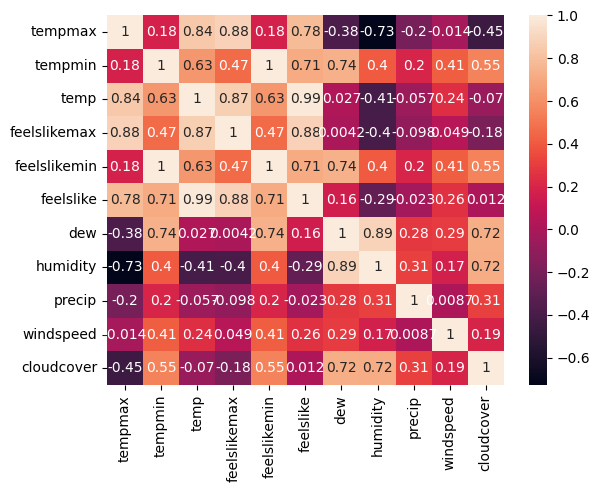

In [64]:
""" for getting corelation matrix  """
corr_ds=training.drop(["conditions"],axis=1)
corr=corr_ds.corr()
hmap_corr=sb.heatmap(corr,annot=True)

In [65]:
rep_vals = {
    "Rain, Partially cloudy": "rainpartlycloudy",
    "Rain, Overcast": "rainovercast",

}
training["conditions"]=training["conditions"].replace(list(rep_vals.keys()),list(rep_vals.values()))
testing["conditions"]=testing["conditions"].replace(list(rep_vals.keys()),list(rep_vals.values()))

In [66]:
training

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,windspeed,cloudcover,conditions
0,85.3,60.9,71.2,86.7,60.9,71.6,63.1,77.3,0.000,11.0,70.3,Partially cloudy
1,83.9,63.6,71.6,84.0,63.6,71.6,63.2,76.7,0.000,8.9,69.6,Partially cloudy
2,83.0,60.5,70.5,82.6,60.5,70.5,60.4,73.3,0.000,9.4,60.4,Partially cloudy
3,80.3,63.2,70.7,81.4,63.2,70.8,63.2,78.7,0.036,10.1,60.2,rainpartlycloudy
4,80.8,62.5,71.1,82.9,62.5,71.3,63.9,79.1,0.004,8.3,86.3,rainpartlycloudy
...,...,...,...,...,...,...,...,...,...,...,...,...
969,77.1,68.8,72.1,77.1,68.8,72.1,67.6,86.0,0.028,13.6,90.4,Overcast
970,78.7,69.5,72.8,78.7,69.5,72.8,67.7,84.7,0.032,14.1,65.1,Partially cloudy
971,80.3,68.4,73.4,82.9,68.4,73.6,67.3,82.0,0.028,11.0,78.4,Partially cloudy
972,81.6,68.6,74.2,84.4,68.6,74.7,67.3,79.9,0.024,10.5,94.4,rainovercast


In [67]:
testing

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,windspeed,cloudcover,conditions
0,81.2,68.8,73.4,84.3,68.8,73.8,67.7,83.0,0.020,14.5,77.8,rainpartlycloudy
1,79.6,69.0,73.1,79.6,69.0,73.1,67.7,83.8,0.024,15.7,71.2,Partially cloudy
2,77.4,69.9,72.4,77.4,69.9,72.4,67.9,86.0,0.024,13.0,84.3,rainpartlycloudy
3,79.4,69.0,73.0,79.4,69.0,73.0,67.0,82.2,0.008,14.8,59.7,rainpartlycloudy
4,80.5,67.7,73.0,83.2,67.7,73.2,67.0,82.5,0.016,14.5,40.9,rainpartlycloudy
5,80.0,69.0,73.1,80.0,69.0,73.1,67.4,83.1,0.028,14.1,42.0,Partially cloudy
6,78.5,68.8,72.5,78.5,68.8,72.5,67.0,83.5,0.036,13.4,38.5,Partially cloudy
7,80.5,68.4,73.3,83.2,68.4,73.5,67.2,82.0,0.036,12.8,50.3,Partially cloudy
8,81.4,68.3,73.8,84.0,68.3,74.3,67.0,80.3,0.024,13.4,65.8,Partially cloudy
9,77.1,68.1,72.3,77.1,68.1,72.3,66.7,83.1,0.012,11.2,92.5,Overcast


In [68]:
X=training.loc[:,training.columns!="temp"].values
X_test=testing.loc[:,testing.columns!="temp"].values
y=training.loc[:,training.columns=="temp"].values
y_test=testing.loc[:,testing.columns=="temp"].values



In [69]:
X.shape

(974, 11)

In [70]:
X_test.shape

(15, 11)

In [71]:
y

array([[71.2],
       [71.6],
       [70.5],
       [70.7],
       [71.1],
       [72.9],
       [71.8],
       [71.5],
       [73.7],
       [74.4],
       [74. ],
       [72.9],
       [72.7],
       [72. ],
       [71.6],
       [72.6],
       [74.7],
       [75.3],
       [73.6],
       [73. ],
       [70.4],
       [70.7],
       [71.8],
       [71.2],
       [69.6],
       [69.8],
       [69.2],
       [69.4],
       [68.8],
       [69.8],
       [70.3],
       [70.1],
       [69.5],
       [68.3],
       [68.8],
       [69.5],
       [67.9],
       [67.7],
       [67.6],
       [68. ],
       [69.5],
       [71.9],
       [73. ],
       [72.4],
       [72.3],
       [72.1],
       [72. ],
       [72.7],
       [72.3],
       [70.3],
       [70.7],
       [72.9],
       [75. ],
       [76.5],
       [76.3],
       [76.6],
       [77.3],
       [76.9],
       [78.3],
       [79.4],
       [79. ],
       [78.1],
       [78.2],
       [78. ],
       [78.1],
       [78.8],
       [78

In [72]:
y_test

array([[73.4],
       [73.1],
       [72.4],
       [73. ],
       [73. ],
       [73.1],
       [72.5],
       [73.3],
       [73.8],
       [72.3],
       [73.3],
       [73.3],
       [72.1],
       [73.2],
       [73.9]])

In [73]:
condition_set=set(X[:,-1])

In [74]:
condition_set

{'Clear',
 'Overcast',
 'Partially cloudy',
 'Rain',
 'rainovercast',
 'rainpartlycloudy'}

In [75]:
condition_set_test=set(X_test[:,-1])
condition_set_test

{'Overcast', 'Partially cloudy', 'rainpartlycloudy'}

In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X)).astype(np.float32)
X_test=np.array(ct.transform(X_test)).astype(np.float32)

In [77]:
X

array([[0.00e+00, 0.00e+00, 1.00e+00, ..., 0.00e+00, 1.10e+01, 7.03e+01],
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 0.00e+00, 8.90e+00, 6.96e+01],
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 0.00e+00, 9.40e+00, 6.04e+01],
       ...,
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 2.80e-02, 1.10e+01, 7.84e+01],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 2.40e-02, 1.05e+01, 9.44e+01],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 1.20e-02, 1.01e+01, 9.30e+01]],
      dtype=float32)

In [78]:
X[0].shape

(16,)

In [79]:
X[0]

array([ 0. ,  0. ,  1. ,  0. ,  0. ,  0. , 85.3, 60.9, 86.7, 60.9, 71.6,
       63.1, 77.3,  0. , 11. , 70.3], dtype=float32)

In [80]:
X_test[0]

array([0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
       8.12e+01, 6.88e+01, 8.43e+01, 6.88e+01, 7.38e+01, 6.77e+01,
       8.30e+01, 2.00e-02, 1.45e+01, 7.78e+01], dtype=float32)

In [81]:
X_test[0].shape

(16,)

In [82]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X[:,6:]=sc.fit_transform(X[:,6:])
X_test[:,6:]=sc.transform(X_test[:,6:])


In [83]:
X[0]

array([ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        , -0.4114093 , -0.7940146 , -0.31946436, -0.7940146 ,
       -0.8589593 ,  0.24292757,  0.5926023 , -0.31653488, -0.1518722 ,
        0.5497843 ], dtype=float32)

In [84]:
X_test[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        , -0.985859  ,  0.39780554, -0.6850655 ,  0.39780554,
       -0.4405598 ,  0.7049613 ,  0.8793956 , -0.25363734,  0.69924134,
        0.78785026], dtype=float32)

In [85]:
import keras

model=keras.Sequential()
model.add(keras.layers.Dense(8,activation=keras.activations.relu))
model.add(keras.layers.Dense(8,activation=keras.activations.relu))
model.add(keras.layers.Dense(1))


In [86]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [87]:
model.fit(X,y,batch_size=32,epochs=200)

Epoch 1/200
31/31 [==============================] - 0s 800us/step - loss: 5818.3970
Epoch 2/200
31/31 [==============================] - 0s 735us/step - loss: 5756.6484
Epoch 3/200
31/31 [==============================] - 0s 767us/step - loss: 5680.2085
Epoch 4/200
31/31 [==============================] - 0s 800us/step - loss: 5561.6318
Epoch 5/200
31/31 [==============================] - 0s 834us/step - loss: 5380.3159
Epoch 6/200
31/31 [==============================] - 0s 817us/step - loss: 5120.4341
Epoch 7/200
31/31 [==============================] - 0s 767us/step - loss: 4771.7944
Epoch 8/200
31/31 [==============================] - 0s 800us/step - loss: 4331.9692
Epoch 9/200
 1/31 [..............................] - ETA: 0s - loss: 3898.2783

31/31 [==============================] - 0s 834us/step - loss: 3809.6765
Epoch 10/200
31/31 [==============================] - 0s 900us/step - loss: 3209.8813
Epoch 11/200
31/31 [==============================] - 0s 800us/step - loss: 2575.0093
Epoch 12/200
31/31 [==============================] - 0s 800us/step - loss: 1971.3466
Epoch 13/200
31/31 [==============================] - 0s 736us/step - loss: 1443.0146
Epoch 14/200
31/31 [==============================] - 0s 700us/step - loss: 1023.9078
Epoch 15/200
31/31 [==============================] - 0s 633us/step - loss: 729.7451
Epoch 16/200
31/31 [==============================] - 0s 700us/step - loss: 533.0192
Epoch 17/200
31/31 [==============================] - 0s 702us/step - loss: 414.0339
Epoch 18/200
31/31 [==============================] - 0s 733us/step - loss: 338.5753
Epoch 19/200
31/31 [==============================] - 0s 733us/step - loss: 288.7841
Epoch 20/200
31/31 [==============================] - 0s 700us/step - lo

In [88]:
from sklearn.metrics import mean_absolute_error
y_pred=model.predict(X)
mean_absolute_error(y,y_pred)

31/31 [==============================] - 0s 550us/step


0.7039971643404792

In [89]:
for true,pred in zip(y,y_pred):
    print(true," -> ",pred," error= ",abs(true-pred))

[71.2]  ->  [71.47545]  error=  [0.27544861]
[71.6]  ->  [72.3074]  error=  [0.70740356]
[70.5]  ->  [71.00943]  error=  [0.50942993]
[70.7]  ->  [71.01747]  error=  [0.31747131]
[71.1]  ->  [71.67206]  error=  [0.57205811]
[72.9]  ->  [73.594536]  error=  [0.69453583]
[71.8]  ->  [71.021255]  error=  [0.77874451]
[71.5]  ->  [67.04823]  error=  [4.45176697]
[73.7]  ->  [72.36455]  error=  [1.33545227]
[74.4]  ->  [74.0892]  error=  [0.31079712]
[74.]  ->  [74.150696]  error=  [0.1506958]
[72.9]  ->  [73.662025]  error=  [0.76202545]
[72.7]  ->  [73.222046]  error=  [0.5220459]
[72.]  ->  [72.6342]  error=  [0.63420105]
[71.6]  ->  [72.25313]  error=  [0.65312805]
[72.6]  ->  [73.05611]  error=  [0.45610657]
[74.7]  ->  [75.34345]  error=  [0.64345245]
[75.3]  ->  [75.86357]  error=  [0.56357117]
[73.6]  ->  [73.83248]  error=  [0.23248138]
[73.]  ->  [73.450195]  error=  [0.45019531]
[70.4]  ->  [70.99646]  error=  [0.59645996]
[70.7]  ->  [70.83059]  error=  [0.13058929]
[71.8]  ->  

In [90]:
X.shape

(974, 16)

In [91]:
y_test

array([[73.4],
       [73.1],
       [72.4],
       [73. ],
       [73. ],
       [73.1],
       [72.5],
       [73.3],
       [73.8],
       [72.3],
       [73.3],
       [73.3],
       [72.1],
       [73.2],
       [73.9]])

In [92]:
X_test.shape

(15, 16)

In [93]:
y_pred_test=model.predict(X_test)
mean_absolute_error(y_test,y_pred_test)

1/1 [==============================] - 0s 17ms/step


0.41847381591796873

In [94]:
for true,pred in zip(y_test,y_pred_test):
    print(true," -> ",pred," error= ",abs(true-pred))

[73.4]  ->  [73.3398]  error=  [0.06020203]
[73.1]  ->  [73.11766]  error=  [0.01766052]
[72.4]  ->  [72.87481]  error=  [0.47480927]
[73.]  ->  [73.475746]  error=  [0.47574615]
[73.]  ->  [72.51969]  error=  [0.48030853]
[73.1]  ->  [72.95981]  error=  [0.14019165]
[72.5]  ->  [72.282005]  error=  [0.21799469]
[73.3]  ->  [72.74028]  error=  [0.55971985]
[73.8]  ->  [73.61]  error=  [0.18999939]
[72.3]  ->  [71.405075]  error=  [0.89492493]
[73.3]  ->  [72.82532]  error=  [0.47468262]
[73.3]  ->  [72.76039]  error=  [0.53960876]
[72.1]  ->  [72.57737]  error=  [0.47736969]
[73.2]  ->  [72.69448]  error=  [0.5055191]
[73.9]  ->  [73.13163]  error=  [0.76837006]


In [95]:
model.save("modelv1.keras")

In [96]:
X_test[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        , -0.985859  ,  0.39780554, -0.6850655 ,  0.39780554,
       -0.4405598 ,  0.7049613 ,  0.8793956 , -0.25363734,  0.69924134,
        0.78785026], dtype=float32)

In [97]:
y_test[0]

array([73.4])